In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [352]:
df=pd.read_csv("Downloads/Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1)

In [353]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [355]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [356]:
df.shape

(246, 14)

In [357]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [358]:
df.day.str.isnumeric().sum()

244

In [359]:
df[~df['day'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [360]:
df=df.drop(df.index[[122,123]])

In [361]:
df.shape

(244, 14)

In [362]:
df["day"]=df["day"].astype(int)

In [363]:
df["day"].dtype

dtype('int32')

In [364]:
df["month"].str.isnumeric().sum()

244

In [365]:
df["month"]=df["month"].astype(float)

In [366]:
df["month"].dtype

dtype('float64')

In [367]:
df["year"].str.isnumeric().sum()

244

In [368]:
df["year"]=df["year"].astype(float)

In [369]:
df["Temperature"].str.isnumeric().sum()

244

In [370]:
df["Temperature"]=df["Temperature"].astype(float)

In [371]:
df[df["FFMC"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
11,12,6.0,2012.0,26.0,81,19,0,84,13.8,61.4,4.8,17.7,7.1,fire
12,13,6.0,2012.0,27.0,84,21,1.2,50,6.7,17,0.5,6.7,0.2,not fire
13,14,6.0,2012.0,30.0,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire
20,21,6.0,2012.0,30.0,78,14,0,81,6.3,31.6,2.6,8.4,2.2,fire
26,27,6.0,2012.0,34.0,53,18,0,89,21.6,80.3,9.2,25.8,15,fire
35,6,7.0,2012.0,32.0,63,14,0,87,10.9,37,5.6,12.5,6.8,fire
36,7,7.0,2012.0,35.0,64,18,0.2,80,9.7,40.4,2.8,12.1,3.2,not fire
53,24,7.0,2012.0,28.0,78,16,0.1,70,9.6,79.7,1.4,14.7,1.3,not fire
62,2,8.0,2012.0,35.0,55,12,0.4,78,5.8,10,1.7,5.5,0.8,not fire
64,4,8.0,2012.0,34.0,69,13,0,85,8.2,19.8,4,8.2,3.9,fire


In [372]:
df[~df['FFMC'].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6.0,2012.0,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9.0,2012.0,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9.0,2012.0,28.0,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9.0,2012.0,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [373]:
df["FFMC"]=df["FFMC"].astype(float)

In [374]:
df["DMC"].str.isnumeric().sum()

26

In [375]:
df[~df["DMC"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
5,6,6.0,2012.0,31.0,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,9.0,2012.0,28.0,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire
242,27,9.0,2012.0,28.0,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,9.0,2012.0,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [376]:
df["DC"].str.isnumeric().sum()

27

In [377]:
df[~df["DC"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6.0,2012.0,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,9.0,2012.0,28.0,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire
241,26,9.0,2012.0,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,28,9.0,2012.0,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [378]:
df["DC"]=df["DC"].replace('14.6 9','14.69')

In [379]:
df["DC"]=df["DC"].astype(float)

In [380]:
df["ISI"].str.isnumeric().sum()

30

In [381]:
df[~df["ISI"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,3,6.0,2012.0,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,5,6.0,2012.0,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6.0,2012.0,31.0,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6.0,2012.0,33.0,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9.0,2012.0,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9.0,2012.0,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,not fire
243,28,9.0,2012.0,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [382]:
df["ISI"]=df["ISI"].astype(float)

In [383]:
df["BUI"].str.isnumeric().sum()

22

In [384]:
df[~df["BUI"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6.0,2012.0,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9.0,2012.0,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,9.0,2012.0,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,not fire
243,28,9.0,2012.0,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [385]:
df["BUI"]=df["BUI"].astype(float)

In [386]:
df["FWI"].str.isnumeric().sum()

28

In [387]:
df[~df["FWI"].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,5,6.0,2012.0,27.0,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6.0,2012.0,31.0,67,14,0,82.6,5.8,22.2,3.1,7.0,2.5,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,24,9.0,2012.0,26.0,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire
241,26,9.0,2012.0,30.0,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,28,9.0,2012.0,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [388]:
df["FWI"]=df["FWI"].replace('fire   ', ' 0')

In [389]:
df["FWI"]=df["FWI"].astype(float)

In [390]:
df[" RH"].str.isnumeric().sum()

244

In [391]:
df[" RH"]=df[" RH"].astype(float)

In [392]:
df[" Ws"].str.isnumeric().sum()

244

In [393]:
df[" Ws"]=df[" Ws"].astype(float)

In [394]:
df["DMC"]=df[" Ws"].astype(float)

In [395]:
df["Rain "].str.isnumeric().sum()

140

In [396]:
df[~df["Rain "].str.isnumeric()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,13.0,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,22.0,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,13.0,6.9,0.0,1.7,0.0,not fire
8,9,6.0,2012.0,25.0,88.0,13.0,0.2,52.9,13.0,38.8,0.4,10.5,0.3,not fire
12,13,6.0,2012.0,27.0,84.0,21.0,1.2,50.0,21.0,17.0,0.5,6.7,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,20,9.0,2012.0,34.0,58.0,13.0,0.2,79.5,13.0,88.0,2.1,24.4,3.8,not fire
242,27,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,15.0,8.0,0.1,6.2,0.0,not fire
243,28,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,29.0,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,18.0,15.2,1.7,5.1,0.7,not fire


In [397]:
df["Rain "]=df["Rain "].astype(float)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(12), int32(1), object(1)
memory usage: 27.6+ KB


In [399]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [400]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [198]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.047001,0.527930,0.177727,0.517229,0.350882
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,-0.041447,0.127669,0.061680,0.085822,0.084201
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,-0.278132,0.370511,0.607551,0.455504,0.558393
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,0.236084,-0.220344,-0.690637,-0.348587,-0.569997
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,1.000000,0.076253,0.015248,0.029756,0.028799
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,0.170169,-0.296808,-0.347105,-0.299171,-0.322682
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,-0.163255,0.503919,0.739730,0.589652,0.686033
DMC,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,1.000000,0.076253,0.015248,0.029756,0.028799
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.076253,1.000000,0.498926,0.941906,0.740186


In [401]:
### Logistic Regression 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
sns.set()

In [402]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,18.0,7.6,1.3,3.4,0.5,not fire
1,2,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,13.0,7.6,1.0,3.9,0.4,not fire
2,3,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,22.0,7.1,0.3,2.7,0.1,not fire
3,4,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,13.0,6.9,0.0,1.7,0.0,not fire
4,5,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,16.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,14.0,44.5,4.5,16.9,6.5,fire
242,27,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,15.0,8.0,0.1,6.2,0.0,not fire
243,28,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,29.0,7.9,0.4,3.4,0.2,not fire
244,29,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,18.0,15.2,1.7,5.1,0.7,not fire


In [201]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


In [202]:
df["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [403]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [404]:
df.dropna(inplace=True)

In [205]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [405]:
df.shape

(243, 14)

In [406]:
df["Classes  "]=df["Classes  "].replace('not fire   ', 'not fire')
df["Classes  "]=df["Classes  "].replace('fire   ', 'fire')
df["Classes  "]=df["Classes  "].replace('fire ', 'fire')
df["Classes  "]=df["Classes  "].replace('not fire ', 'not fire')
df["Classes  "]=df["Classes  "].replace('Classes  ', 'nan')
df["Classes  "]=df["Classes  "].replace('not fire     ', 'not fire')
df["Classes  "]=df["Classes  "].replace('not fire    ', 'not fire')

In [407]:
df["Classes  "].value_counts()   #### this data is balanced therefore we will calculate the accuracy directly

fire        137
not fire    106
Name: Classes  , dtype: int64

In [412]:
df["Classes  "]=df["Classes  "].replace('not fire', 0)
df["Classes  "]=df["Classes  "].replace('fire', 1)

In [413]:
df["Classes  "].value_counts() 

1    137
0    106
Name: Classes  , dtype: int64

In [414]:
df["Classes  "]=df["Classes  "].astype(int)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int32  
dtypes: float64(12), int32(2)
memory usage: 26.6 KB


In [438]:
df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [439]:
df["month"].unique()

array([6., 7., 8., 9.])

In [441]:
df["Temperature"].unique()

array([29., 26., 25., 27., 31., 33., 30., 28., 32., 34., 35., 36., 37.,
       22., 24., 38., 39., 40., 42.])

In [436]:
df.drop(columns=["year"], inplace=True) ### year is removed as it is a constant value

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

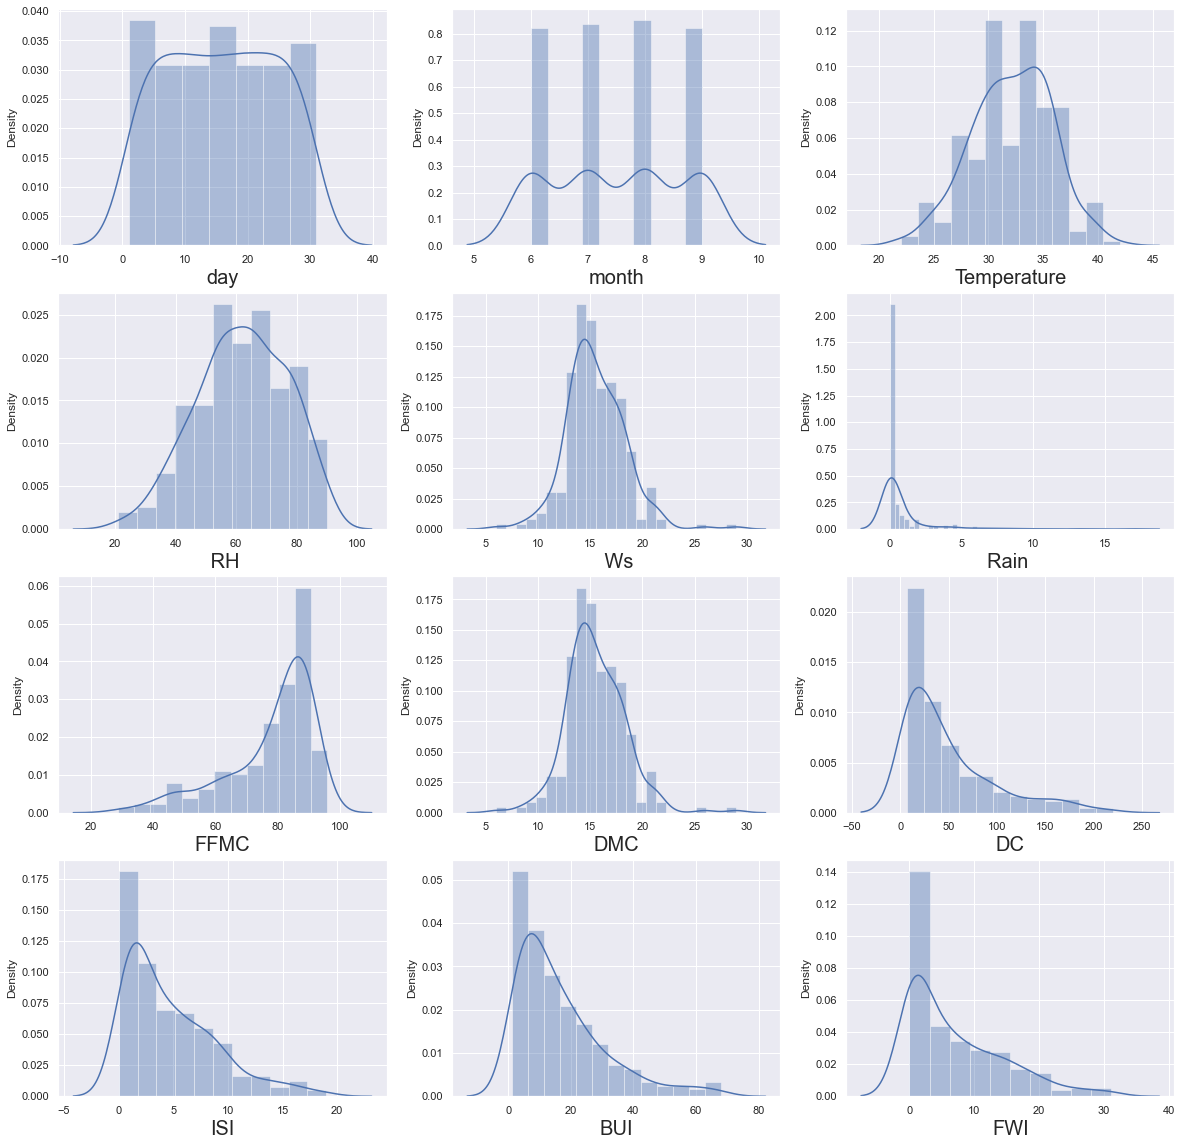

In [437]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [442]:
df[" RH"].unique()

array([57., 61., 82., 89., 77., 67., 54., 73., 88., 79., 65., 81., 84.,
       78., 80., 55., 62., 66., 64., 53., 47., 50., 68., 75., 76., 63.,
       69., 70., 59., 48., 45., 60., 51., 52., 58., 86., 74., 71., 49.,
       44., 41., 42., 90., 87., 72., 46., 37., 36., 56., 43., 83., 29.,
       34., 33., 35., 39., 31., 21., 40., 24., 38., 26.])

In [443]:
df[" Ws"].unique()

array([18., 13., 22., 16., 14., 15., 12., 19., 21., 20., 17., 26., 11.,
       10.,  9.,  8.,  6., 29.])

In [444]:
df["Rain "].unique()

array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

In [445]:
df["Rain "]=df["Rain "].replace(0, df["Rain "].mean())

In [446]:
df["FFMC"].unique()

array([65.7, 64.4, 47.1, 28.6, 64.8, 82.6, 88.2, 86.6, 52.9, 73.2, 84.5,
       84. , 50. , 59. , 49.4, 36.1, 37.3, 56.9, 79.9, 59.8, 81. , 79.1,
       81.4, 85.9, 86.7, 86.8, 89. , 89.1, 88.7, 59.9, 55.7, 63.1, 80.1,
       87. , 80. , 85.6, 66.6, 81.1, 75.1, 81.8, 73.9, 60.7, 72.6, 82.8,
       85.4, 88.1, 73.4, 68.2, 70. , 84.3, 89.2, 90.3, 86.5, 87.2, 78.8,
       78. , 76.6, 85. , 86.4, 77.1, 87.4, 88.9, 81.3, 82.4, 80.2, 89.3,
       89.4, 88.3, 88.6, 89.5, 85.8, 84.9, 90.1, 72.7, 52.5, 46. , 30.5,
       42.6, 68.4, 80.8, 75.8, 69.6, 62. , 56.1, 58.5, 71. , 40.9, 47.4,
       44.9, 78.1, 87.7, 83.8, 87.8, 77.8, 73.7, 68.3, 48.6, 82. , 85.7,
       77.5, 45. , 57.1, 48.7, 79.4, 83.7, 71.4, 90.6, 72.3, 53.4, 66.8,
       62.2, 65.5, 64.6, 60.2, 86.2, 78.3, 74.2, 85.3, 86. , 92.5, 79.7,
       63.7, 87.6, 84.7, 88. , 90.5, 82.3, 74.8, 85.2, 84.6, 86.1, 89.9,
       93.9, 91.5, 87.3, 72.8, 73.8, 87.5, 93.3, 93.7, 93.8, 70.5, 69.7,
       91.7, 94.2, 93. , 91.9, 83.9, 92. , 96. , 94

In [447]:
df["DMC"].unique()

array([18., 13., 22., 16., 14., 15., 12., 19., 21., 20., 17., 26., 11.,
       10.,  9.,  8.,  6., 29.])

In [448]:
df["ISI"].unique()

array([ 1.3,  1. ,  0.3,  0. ,  1.2,  3.1,  6.4,  5.6,  0.4,  4. ,  4.8,
        0.5,  0.7,  2.5,  0.9,  2.6,  2.4,  3.3,  5.7,  6.7,  9.2,  7.6,
        2.2,  7.2,  1.1,  0.8,  2.7,  2.8,  6. ,  1.5,  3. ,  1.4,  3.2,
        4.6,  7.7,  5.2,  1.8, 10. ,  8.7,  4.7,  6.8,  2. ,  1.7,  5.5,
        6.9,  7.4,  7.1,  5.9,  3.7,  9.7,  8.8,  9.9, 10.4,  9. ,  8.2,
        4.4,  7.3, 12.5,  0.6,  0.2,  0.1,  2.1,  1.9,  6.2,  7.8,  4.5,
        5.4,  8.4, 13.4,  5. ,  1.6,  4.9,  7. ,  8. , 11.7, 11.3,  4.3,
        4.1,  8.3,  4.2, 10.9,  9.5, 18.5, 13.2, 13.8, 17.2, 15.7, 19. ,
        9.6, 16.6, 15.5,  7.5, 10.8,  3.5, 16. ,  3.8,  5.1, 11.5, 12.2,
       14.3, 13.1,  8.1,  9.8,  9.1, 14.2, 11.2])

In [449]:
df["ISI"]=df["ISI"].replace(0, df["ISI"].mean())

In [450]:
df["BUI"].unique()

array([ 3.4,  3.9,  2.7,  1.7,  7. , 10.9, 13.5, 10.5, 12.6, 15.8, 17.7,
        6.7,  4.4,  3. ,  2.2,  1.6,  2.4,  5.3,  5.1,  8.4,  9.7, 11.5,
       14.9, 18.3, 21.6, 25.8, 29.7, 23.8, 28.3,  2.9,  2.8,  5.7,  9.1,
       12.5, 12.1, 15.4,  7.4,  5.8,  8.1,  9.2, 11.7,  5.9,  8.3, 11.1,
       14.2, 18.2, 16.5, 22.4, 21.7, 14.7, 18.5, 23.9, 29.4, 32.1, 35. ,
       37.4, 41.2,  4.7,  5.5,  8.2, 17.2, 14.1, 17.9, 21.9, 25.5, 20.7,
       24.4, 27.2, 22. , 17.6, 22.9, 27.5, 31.3, 34.7, 38.8, 43.1, 47.5,
       50.9, 54.7, 57.1, 59.3, 62.9, 67.4,  1.8,  1.1,  5.6,  2.6,  3.7,
        1.4,  4.2,  7.7, 11.3, 16. , 19.2, 12.9,  9.6,  6.2,  9. ,  6.8,
        6.5,  9.3, 10.7,  7.3, 13.1, 18. , 21.2,  6.1,  7.1,  4.1,  3.8,
        9.9, 12.7, 16.4, 20.8, 27.1, 17.8,  3.3,  7.8, 10.3, 18.7, 16.7,
       13.7,  9.4, 20.9, 27.7, 32.6, 39.5, 44. , 46.5, 11.4, 11.8, 15.7,
       19.5, 10.6, 16.9, 23.5,  6.9, 11. , 18.4, 17.5, 22.3, 19. , 24.2,
       30.4, 35.9, 35.5, 38.1, 41.3, 45.5, 50.2, 54

In [451]:
df["FWI"].unique()

array([ 0.5,  0.4,  0.1,  0. ,  2.5,  7.2,  7.1,  0.3,  0.9,  5.6,  0.2,
        1.4,  2.2,  2.3,  3.8,  7.5,  8.4, 10.6, 15. , 13.9,  3.9, 12.9,
        1.7,  4.9,  6.8,  3.2,  8. ,  0.6,  3.4,  0.8,  3.6,  6. , 10.9,
        4. ,  8.8,  2.8,  2.1,  1.3,  7.3, 15.3, 11.3, 11.9, 10.7, 15.7,
        6.1,  2.6,  9.9, 11.6, 12.1,  4.2, 10.2,  6.3, 14.6, 16.1, 17.2,
       16.8, 18.4, 20.4, 22.3, 20.9, 20.3, 13.7, 13.2, 19.9, 30.2,  5.9,
        7.7,  9.7,  8.3,  0.7,  4.1,  1. ,  3.1,  1.9, 10. , 16.7,  1.2,
        5.3,  6.7,  9.5, 12. ,  6.4,  5.2,  3. ,  9.6,  4.7, 14.1,  9.1,
       13. , 17.3, 30. , 25.4, 16.3,  9. , 14.5, 13.5, 19.5, 12.6, 12.7,
       21.6, 18.8, 10.5,  5.5, 14.8, 24. , 26.3, 12.2, 18.1, 24.5, 26.9,
       31.1, 30.3, 26.1, 16. , 19.4,  2.7,  3.7, 10.3,  5.7,  9.8, 19.3,
       17.5, 15.4, 15.2,  6.5])

In [452]:
df["FWI"]=df["FWI"].replace(0, df["FWI"].mean())

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

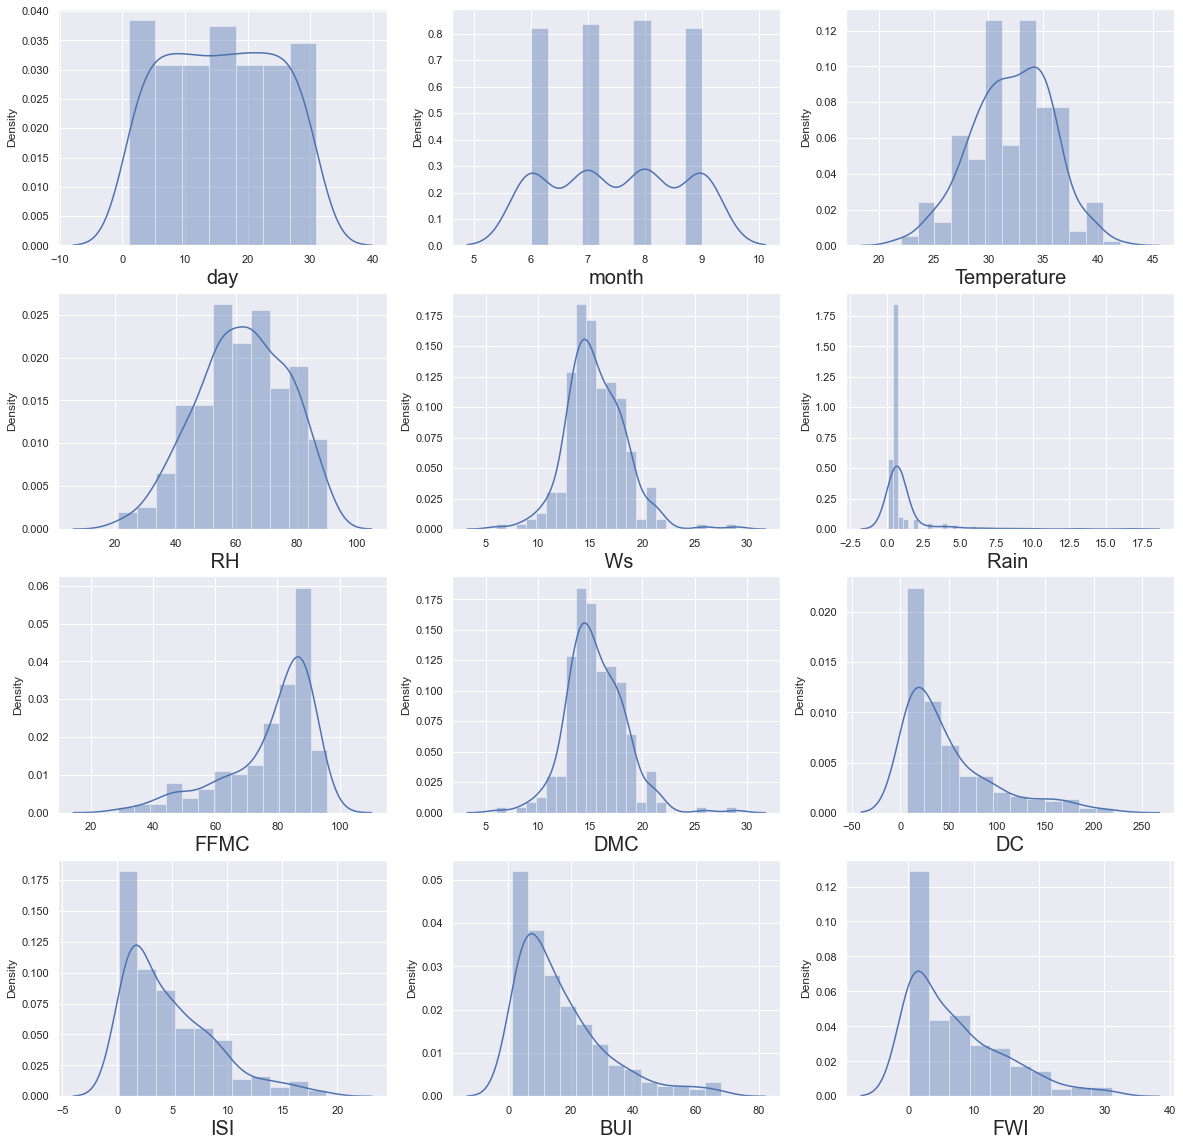

In [453]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

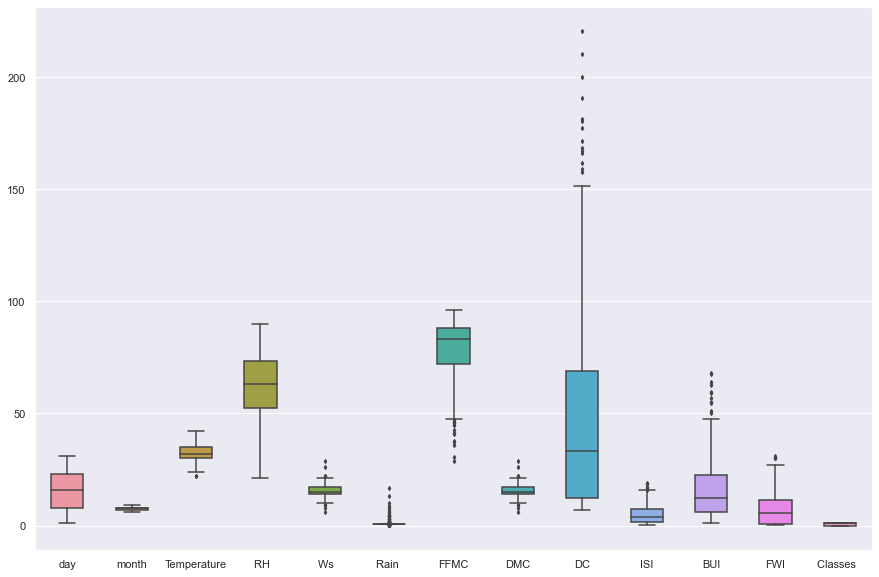

In [454]:
##check the outliers
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

In [455]:
q=df[" Ws"].quantile(0.98)

In [456]:
cleaned_data=df[df[" Ws"]<q]

In [457]:
q=df["Rain "].quantile(0.98)

In [458]:
cleaned_data=df[df["Rain "]<q]

In [459]:
q=df["DMC"].quantile(0.99)

In [460]:
cleaned_data=df[df["DMC"]<q]

In [461]:
q=df["FFMC"].quantile(0.75)

In [462]:
q

88.3

In [463]:
cleaned_data=df[df["FFMC"]<q]

In [464]:
q=df["DC"].quantile(0.95)

In [465]:
cleaned_data=df[df["DC"]<q]

In [466]:
q=df["BUI"].quantile(0.95)

In [467]:
cleaned_data=df[df["BUI"]<q]

In [468]:
q=df["FWI"].quantile(0.95)

In [469]:
cleaned_data=df[df["FWI"]<q]

In [470]:
cleaned_data.shape

(230, 13)

<AxesSubplot:>

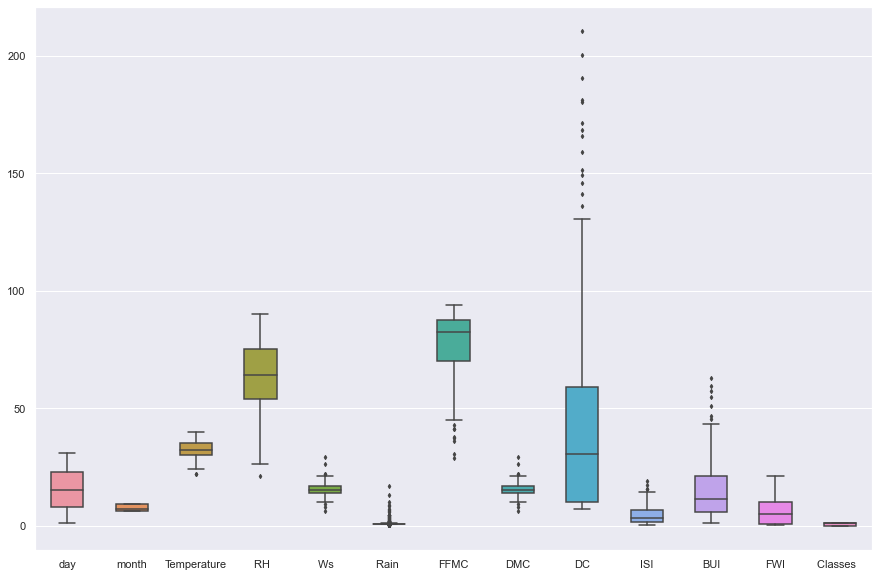

In [471]:
## after removing the outliers 
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=cleaned_data, width=0.5, ax=ax, fliersize=3)

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

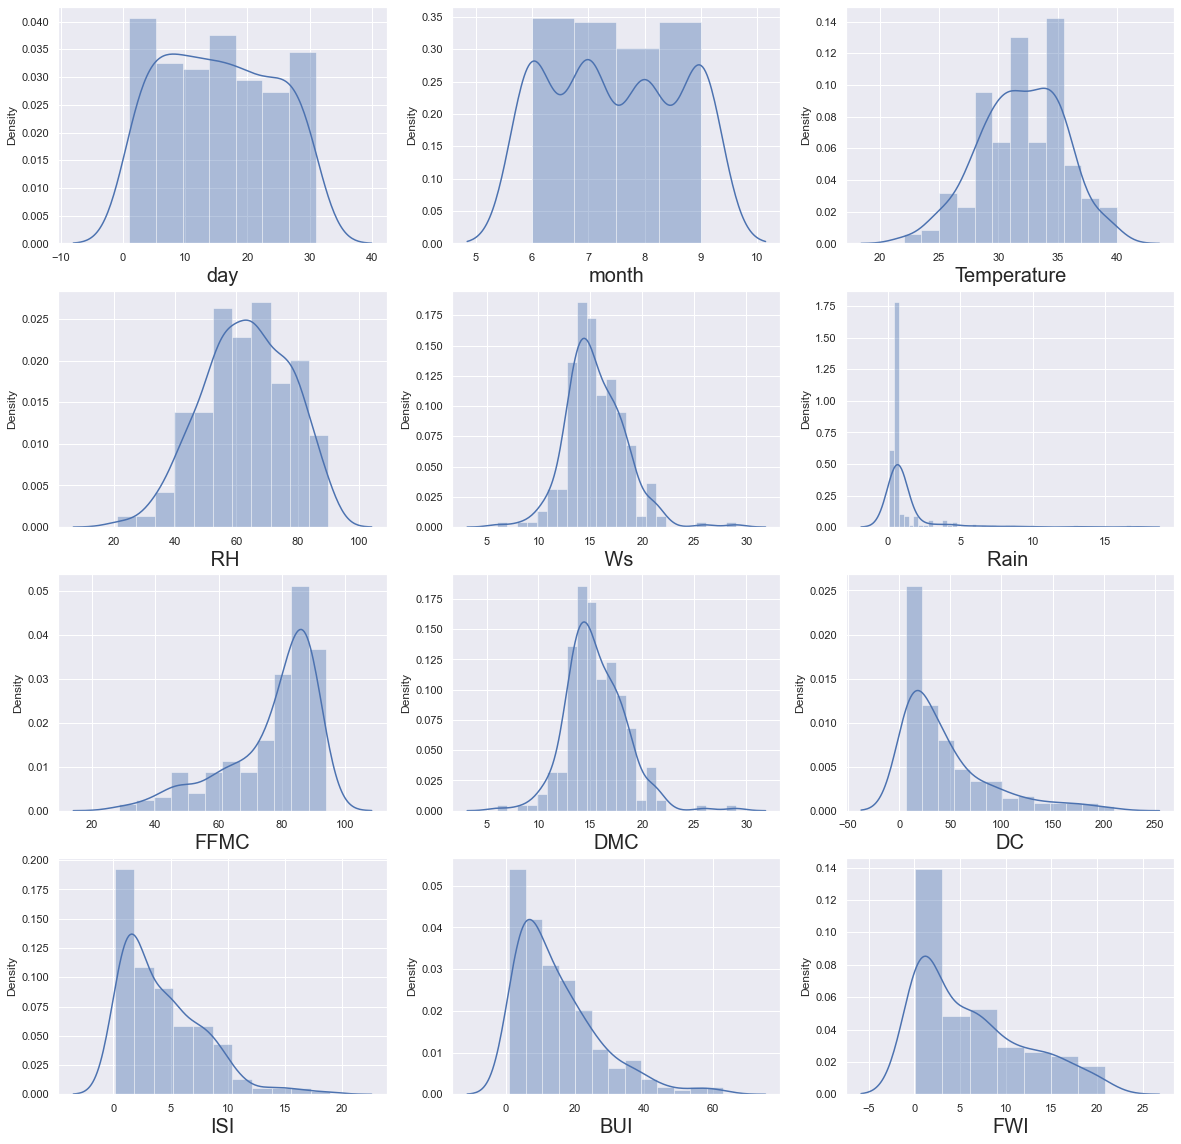

In [472]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in cleaned_data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(cleaned_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [473]:
### box-cox
from feature_engine import transformation as vt

In [474]:
# initialize the transformer with a group of variables to transform
bct = vt.PowerTransformer(variables = ['day', ' RH', 'BUI', 'DC', "FFMC", "Temperature"])

# fit transformer to the data set
bct.fit(df)

PowerTransformer(variables=['day', ' RH', 'BUI', 'DC', 'FFMC', 'Temperature'])

In [475]:
# transform the indicated variables in our dataframe
# returns a new dataframe

data_tf = bct.transform(df)

C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prate\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

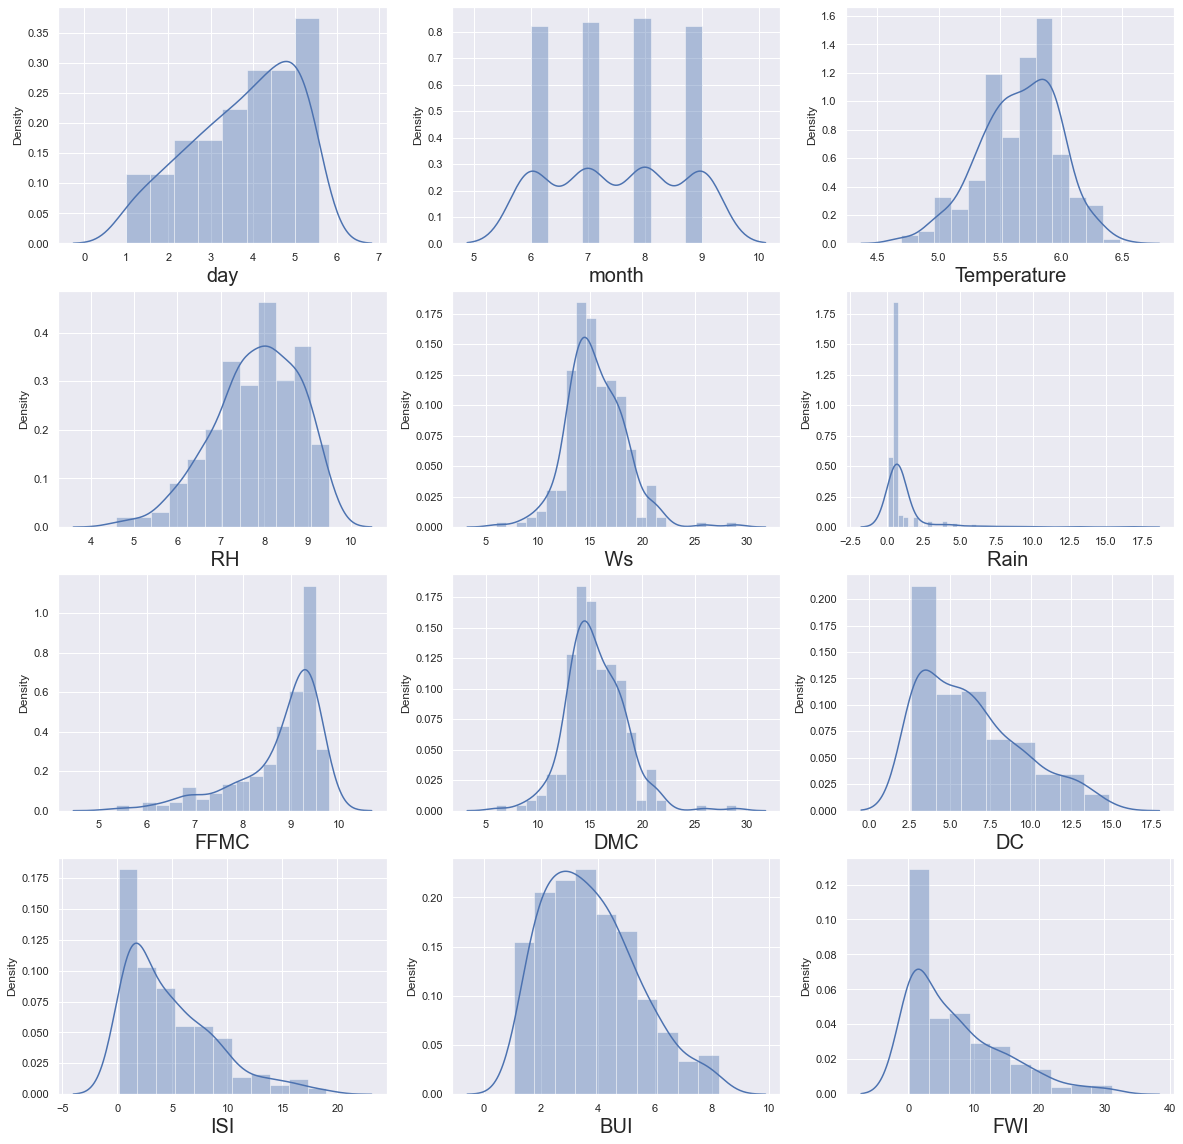

In [476]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_tf:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data_tf[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [477]:
### split the data
X=data_tf.drop(columns=["Classes  "])
y=data_tf["Classes  "]

In [478]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.000000,6.0,5.385165,7.549834,18.0,0.762963,8.105554,18.0,2.756810,1.300000,1.843909,0.500000
1,1.414214,6.0,5.385165,7.810250,13.0,1.300000,8.024961,13.0,2.756810,1.000000,1.974842,0.400000
2,1.732051,6.0,5.099020,9.055385,22.0,13.100000,6.862944,22.0,2.664583,0.300000,1.643168,0.100000
3,2.000000,6.0,5.000000,9.433981,13.0,2.500000,5.347897,13.0,2.626785,4.742387,1.303840,7.035391
4,2.236068,6.0,5.196152,8.774964,16.0,0.762963,8.049845,16.0,3.768289,1.200000,1.974842,0.500000


In [479]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes  , dtype: int32

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<IPython.core.display.Javascript object>

In [481]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [482]:
X_train

array([[ 0.33074581,  1.34865164,  1.00539636, ...,  0.88912536,
         0.88634784,  0.99325891],
       [-1.07267146,  1.34865164,  0.49569474, ..., -0.94590846,
        -1.15647595, -0.95483501],
       [-1.63417811,  0.44624503,  1.74409661, ...,  2.77003503,
         0.17399192,  1.52573791],
       ...,
       [ 1.00099436,  1.34865164, -0.29784928, ..., -0.60183962,
        -0.7887473 , -0.7860002 ],
       [ 0.33074581, -0.45616158, -0.29784928, ..., -0.12014324,
        -0.02952927, -0.22754661],
       [ 0.68119888, -0.45616158, -0.02923189, ...,  1.85251811,
         1.67203916,  2.29198819]])

In [483]:
X_test

array([[ 0.42173583,  1.34865164, -0.84841025, -0.20130095, -0.54024971,
        -0.22394247,  0.73394521, -0.54024971, -0.00532153,  0.61387028,
        -0.02952927,  0.25298322],
       [ 1.2249472 , -1.3585682 ,  1.25493595, -1.72121118, -0.88892151,
        -0.30276675,  0.54521471, -0.88892151, -0.12127817, -0.0742674 ,
         0.23816162, -0.0716991 ],
       [-0.7760945 , -0.45616158,  0.23522012,  0.48163022,  1.20310929,
        -0.22394247,  0.50829635,  1.20310929,  0.19307311,  0.20098767,
         0.06311966,  0.03219924],
       [ 0.0414319 ,  0.44624503,  1.00539636, -0.33235666, -0.88892151,
        -0.4478751 ,  0.30917535, -0.88892151,  0.99897727, -0.32658455,
         0.51814392, -0.18858474],
       [ 0.33074581,  1.34865164, -0.02923189, -0.74051918, -1.58626511,
        -0.22394247,  0.7399783 , -1.58626511, -0.21719954,  0.38449106,
        -0.27110271, -0.00676264],
       [-0.3940045 ,  0.44624503,  0.75236619,  0.17863825, -0.88892151,
        -0.22394247,  

In [484]:
y_train

233    1
221    0
187    1
236    1
207    1
      ..
67     1
195    1
117    0
47     1
175    1
Name: Classes  , Length: 182, dtype: int32

In [485]:
y_test

110    1
152    1
37     1
75     1
109    1
      ..
182    1
162    1
161    1
173    1
224    1
Name: Classes  , Length: 61, dtype: int32

In [486]:
log_reg=LogisticRegression()

In [487]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [488]:
### saving our model
## sav or pkl
import pickle
with open("modelForPrediction.pkl", "wb") as f:
    pickle.dump(log_reg,f)
with open ('sandardScalar.sav', "wb") as f:
    pickle.dump(sc,f)

In [489]:
with open("modelForPrediction.pkl","rb") as f:
    pickle.load(f)

In [490]:
y_pred=log_reg.predict(X_test)

In [491]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [493]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9016393442622951

In [494]:
##confusion matrix
cof_mat=confusion_matrix(y_test,y_pred)
cof_mat

array([[25,  1],
       [ 5, 30]], dtype=int64)

In [495]:
true_positive=cof_mat[0][0]
true_positive

25

In [497]:
false_positive=cof_mat[0][1]
false_positive

1

In [498]:
false_negative=cof_mat[1][0]
false_negative

5

In [499]:
true_negative=cof_mat[1][1]
true_negative

30

In [500]:
accuracy=(true_positive+true_negative)/(true_positive +true_negative+false_positive+false_negative)
accuracy

0.9016393442622951

In [501]:
#precision
precision=true_positive/(true_positive+false_positive)
precision

0.9615384615384616

In [502]:
#recall
recall=true_positive/(true_positive+false_negative)
recall

0.8333333333333334

In [503]:
#f1 score
f1_score=2*recall*precision/(recall+precision)
f1_score

0.8928571428571429